## Equancy - Lucas Artaud

In [212]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from pandas.errors import SettingWithCopyWarning
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import silhouette_score, accuracy_score

In [213]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [214]:
warnings.simplefilter(action='ignore', category=(FutureWarning))
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))
warnings.simplefilter(action='ignore', category=(UserWarning))

### Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes ?

In [215]:
df_candidates = pd.read_csv('data.csv')

In [216]:
df_candidates.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5,Toulouse


In [217]:
df_candidates.shape

(9582, 6)

In [218]:
df_candidates.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

## 2) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec :
a. la valeur médiane pour les data scientists
b. la valeur moyenne pour les data engineers

In [219]:
df_candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    9565 non-null   object
 1   Metier        9563 non-null   object
 2   Technologies  9582 non-null   object
 3   Diplome       9582 non-null   object
 4   Experience    9488 non-null   object
 5   Ville         9582 non-null   object
dtypes: object(6)
memory usage: 449.3+ KB


In [220]:
df_candidates['Experience'] = pd.to_numeric(df_candidates['Experience'].str.replace(',', '.'))
df_candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entreprise    9565 non-null   object 
 1   Metier        9563 non-null   object 
 2   Technologies  9582 non-null   object 
 3   Diplome       9582 non-null   object 
 4   Experience    9488 non-null   float64
 5   Ville         9582 non-null   object 
dtypes: float64(1), object(5)
memory usage: 449.3+ KB


In [221]:
median_data_scientist = df_candidates.loc[df_candidates['Metier'] == 'Data scientist', 'Experience'].median()
median_data_scientist

2.0

In [222]:
mean_data_engineer = df_candidates.loc[df_candidates['Metier'] == 'Data engineer', 'Experience'].mean()
mean_data_engineer

2.984959174903309

In [223]:
df_candidates.loc[(df_candidates['Metier'] == 'Data scientist') & (df_candidates['Experience'].isnull()), 'Experience'] = median_data_scientist
df_candidates.loc[(df_candidates['Metier'] == 'Data engineer') & (df_candidates['Experience'].isnull()), 'Experience'] = mean_data_engineer

In [224]:
df_candidates.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
dtype: int64

### 3) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne ?

In [225]:
mean_experience_by_profession = df_candidates.groupby('Metier')['Experience'].mean().reset_index()
mean_experience_by_profession

,Metier,Experience
0,Data architecte,3.000476
1,Data engineer,2.984959
2,Data scientist,2.241268
3,Lead data scientist,3.965261


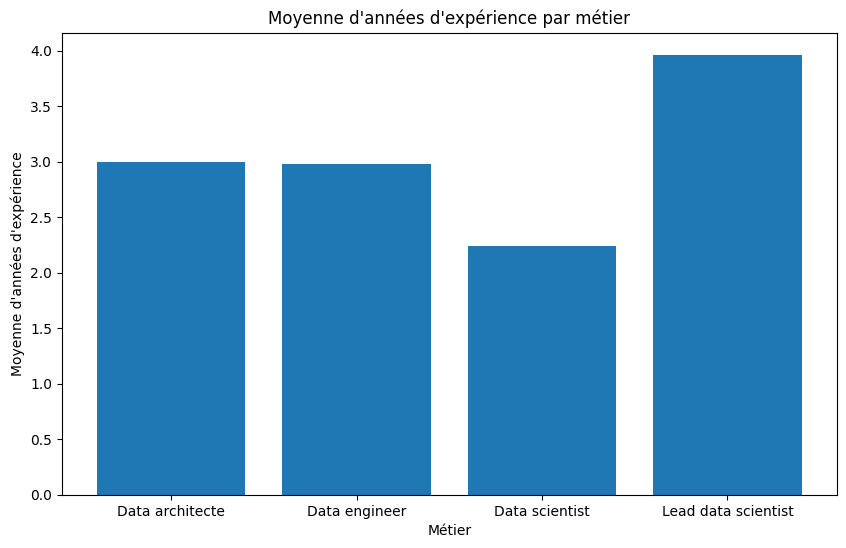

In [226]:
plt.figure(figsize=(10, 6))
plt.bar(mean_experience_by_profession['Metier'], mean_experience_by_profession['Experience'])
plt.title("Moyenne d'années d'expérience par métier")
plt.xlabel('Métier')
plt.ylabel("Moyenne d'années d'expérience")
plt.show()

### 5) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités : débutant, confirmé, avancé et expert.
Veuillez expliquer votre choix de la règle de transformation.

J'ai choisi de séparer les données en quartiles qui contiennent approximativement le même nombre d'observations.

In [227]:
df_candidates['Exp_label'] = pd.qcut(df_candidates['Experience'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['débutant', 'confirmé', 'avancé', 'expert'])
df_candidates.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,expert
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,expert
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,expert
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,expert


### 6) Quelles sont les 5 technologies les plus utilisées ? Faites un graphique

In [228]:
technologies_count = df_candidates['Technologies'].str.split('/').explode().value_counts().head(5)
technologies_count

Technologies
Python    6627
R         4374
SQL       2581
Java      1719
Hadoop    1589
Name: count, dtype: int64

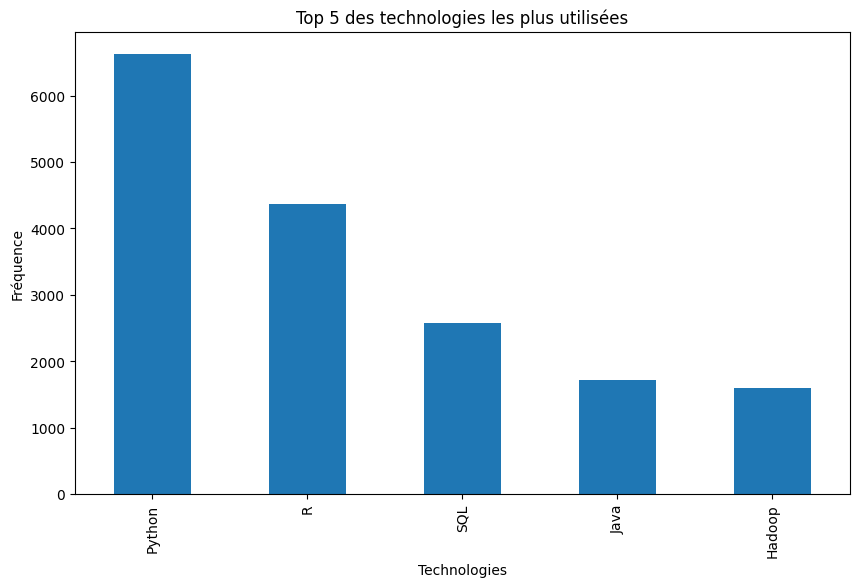

In [229]:
plt.figure(figsize=(10, 6))
technologies_count.plot(kind='bar')
plt.title('Top 5 des technologies les plus utilisées')
plt.xlabel('Technologies')
plt.ylabel('Fréquence')
plt.show()

### 7) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître le nombre de clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.  
a. Justifier le nombre de clusters  
b. Justifier la performance de votre algorithme grâce à une métrique.  
c. Interpréter votre résultat.

In [230]:
df_candidates.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
Exp_label       42
dtype: int64

In [231]:
df_candidates['Experience'].fillna(df_candidates['Experience'].median(), inplace=True)
df_candidates.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
Exp_label       42
dtype: int64

In [232]:
# Elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_candidates[['Experience']])
    inertia.append(kmeans.inertia_)

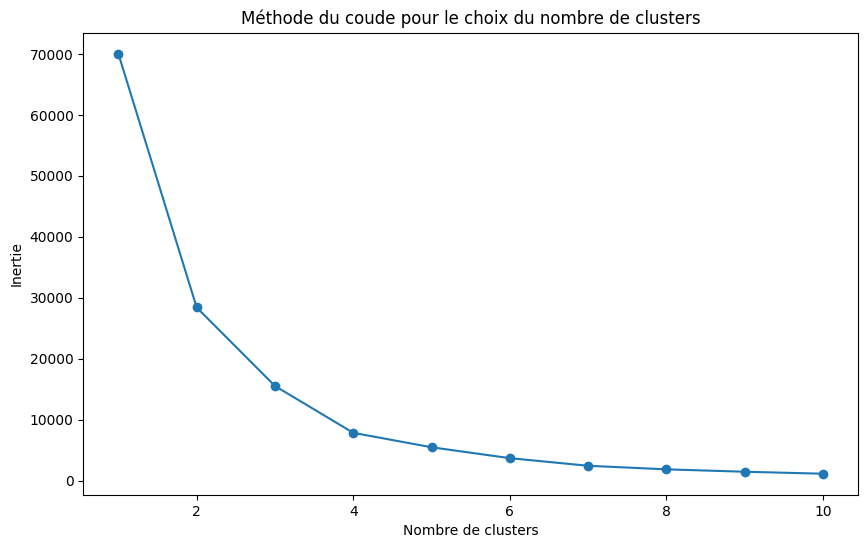

In [233]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude pour le choix du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Because of this graph, let's choose 4 clusters.

In [234]:
X = df_candidates[['Experience']]

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_candidates['KMeans_Cluster'] = kmeans.fit_predict(X)
df_candidates.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,KMeans_Cluster
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant,2
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,2
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,1
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,expert,0
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant,2
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,expert,1
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,expert,0
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,expert,0


In [235]:
silhouette_avg = silhouette_score(X, df_candidates['KMeans_Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6057845064735852


This measure has a range of [-1, 1] so 0.6 is pretty good.

In [236]:
cluster_characteristics = df_candidates.groupby('KMeans_Cluster')[['Experience']].describe()
print(cluster_characteristics)

               Experience                                                   
                    count       mean       std   min   25%   50%   75%   max
KMeans_Cluster                                                              
0                  1351.0   6.334567  1.299794   5.0   5.0   6.0   7.0  10.0
1                  4156.0   2.890808  0.698581   2.0   2.0   3.0   3.5   4.0
2                  3834.0   0.779473  0.558896   0.0   0.5   1.0   1.5   1.5
3                   241.0  13.892116  3.112605  11.0  11.0  13.0  15.0  21.0


count = nombre de personnes  
mean = moyenne d'âge  
std = écart-type  
min = minimum  
25% = 1er quartile  
50% = médiane  
75% = 3e quartile  
max = maximum

The last cluster is more difficult to join because there are only 241 people and the years of experience is very high.

In [237]:
cluster_mapping = {
    0: 'avancé',
    1: 'confirmé',
    2: 'débutant',
    3: 'expert'
}
df_candidates['KMeans_Exp_label'] = df_candidates['KMeans_Cluster'].map(cluster_mapping)
df_candidates.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,KMeans_Cluster,KMeans_Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant,2,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1,confirmé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1,confirmé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,2,débutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,1,confirmé
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,expert,0,avancé
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant,2,débutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,expert,1,confirmé
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,expert,0,avancé
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,expert,0,avancé


### 8)  Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix  
a. Justifier la performance de votre algorithme grâce à une métrique.  
b. Interpréter votre résultat.

In [238]:
df_candidates.isnull().sum()

Entreprise          17
Metier              19
Technologies         0
Diplome              0
Experience           0
Ville                0
Exp_label           42
KMeans_Cluster       0
KMeans_Exp_label     0
dtype: int64

In [239]:
# All the technologies
technologies = df_candidates['Technologies'].str.split('/').explode().unique()
technologies

array(['Matlab', 'Python', 'Pyspark', 'Scikit-learn', 'Tensorflow',
       'Java', 'Scala', 'MongoDB', 'SPSS', 'SQL', 'Teradata', 'R',
       'scikit-learn', 'C', 'C++', 'numpy', 'VBA', 'Excel', 'PySpark',
       'Linux', 'Docker', 'GNU', 'Hadoop', 'Hive', 'MariaDB',
       'machine learning', 'Spark', 'AWS', 'Deep learning', 'PostgreSQL',
       'Elasticsearch', 'Kibana', 'HDFS', 'Yarn', 'Microsoft Azure',
       'Redshift', 'SAS', 'Machine learning', 'Anglais', 'anglais', 'AI',
       'Scoring', 'Perl', 'Ruby', 'Pycharm', 'Vertica', 'Tableau', '',
       'Big data', 'Kafka', 'ORACLE', 'MySQL', 'Cassandra', 'NoSQL',
       'Matplotlib', 'Map-Reduce', 'PIG', 'HBASE', 'Windows', 'NoSQ',
       'Hadoop(HDFS)'], dtype=object)

In [240]:
technologies = [technology for technology in technologies if technology != '']
technologies

['Matlab',
 'Python',
 'Pyspark',
 'Scikit-learn',
 'Tensorflow',
 'Java',
 'Scala',
 'MongoDB',
 'SPSS',
 'SQL',
 'Teradata',
 'R',
 'scikit-learn',
 'C',
 'C++',
 'numpy',
 'VBA',
 'Excel',
 'PySpark',
 'Linux',
 'Docker',
 'GNU',
 'Hadoop',
 'Hive',
 'MariaDB',
 'machine learning',
 'Spark',
 'AWS',
 'Deep learning',
 'PostgreSQL',
 'Elasticsearch',
 'Kibana',
 'HDFS',
 'Yarn',
 'Microsoft Azure',
 'Redshift',
 'SAS',
 'Machine learning',
 'Anglais',
 'anglais',
 'AI',
 'Scoring',
 'Perl',
 'Ruby',
 'Pycharm',
 'Vertica',
 'Tableau',
 'Big data',
 'Kafka',
 'ORACLE',
 'MySQL',
 'Cassandra',
 'NoSQL',
 'Matplotlib',
 'Map-Reduce',
 'PIG',
 'HBASE',
 'Windows',
 'NoSQ',
 'Hadoop(HDFS)']

In [241]:
# Add a column for each technology

for technology in technologies:
    df_candidates[technology] = df_candidates['Technologies'].str.contains(technology)
df_candidates.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,KMeans_Cluster,KMeans_Exp_label,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,Scala,MongoDB,SPSS,SQL,Teradata,R,scikit-learn,C,C++,numpy,...,Redshift,SAS,Machine learning,Anglais,anglais,AI,Scoring,Perl,Ruby,Pycharm,Vertica,Tableau,Big data,Kafka,ORACLE,MySQL,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows,NoSQ,Hadoop(HDFS)
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant,2,débutant,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1,confirmé,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1,confirmé,False,True,False,False,True,False,False,False,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,2,débutant,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,1,confirmé,True,True,False,False,True,False,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,expert,0,avancé,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant,2,débutant,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,expert,1,confirmé,False,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,expert,0,avancé,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,expert,0,avancé,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [242]:
# Convert columns to numeric values
label_encoder = LabelEncoder()
df_candidates['Diplome_encoded'] = label_encoder.fit_transform(df_candidates['Diplome'])
df_candidates['Ville_encoded'] = label_encoder.fit_transform(df_candidates['Ville'])
df_candidates.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,KMeans_Cluster,KMeans_Exp_label,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,Scala,MongoDB,SPSS,SQL,Teradata,R,scikit-learn,C,C++,numpy,...,Machine learning,Anglais,anglais,AI,Scoring,Perl,Ruby,Pycharm,Vertica,Tableau,Big data,Kafka,ORACLE,MySQL,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows,NoSQ,Hadoop(HDFS),Diplome_encoded,Ville_encoded
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant,2,débutant,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,8
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1,confirmé,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,4
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1,confirmé,False,True,False,False,True,False,False,False,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,6
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,2,débutant,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,4
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,1,confirmé,True,True,False,False,True,False,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,0
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,expert,0,avancé,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,2
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant,2,débutant,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,2
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,expert,1,confirmé,False,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,13
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,expert,0,avancé,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,8
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,expert,0,avancé,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,13


In [243]:
df_candidates_without_null = df_candidates.dropna(subset=['Metier'])
df_candidates_without_null.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,KMeans_Cluster,KMeans_Exp_label,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,Scala,MongoDB,SPSS,SQL,Teradata,R,scikit-learn,C,C++,numpy,...,Machine learning,Anglais,anglais,AI,Scoring,Perl,Ruby,Pycharm,Vertica,Tableau,Big data,Kafka,ORACLE,MySQL,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows,NoSQ,Hadoop(HDFS),Diplome_encoded,Ville_encoded
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant,2,débutant,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,8
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1,confirmé,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,4
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1,confirmé,False,True,False,False,True,False,False,False,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,6
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,2,débutant,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,4
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,1,confirmé,True,True,False,False,True,False,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,0
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,expert,0,avancé,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,2
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant,2,débutant,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,2
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,expert,1,confirmé,False,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,13
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,expert,0,avancé,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,8
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,expert,0,avancé,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,13


In [244]:
features_columns = ['Diplome_encoded', 'Experience', 'Ville_encoded', 'KMeans_Cluster'] + technologies
features_columns

['Diplome_encoded',
 'Experience',
 'Ville_encoded',
 'KMeans_Cluster',
 'Matlab',
 'Python',
 'Pyspark',
 'Scikit-learn',
 'Tensorflow',
 'Java',
 'Scala',
 'MongoDB',
 'SPSS',
 'SQL',
 'Teradata',
 'R',
 'scikit-learn',
 'C',
 'C++',
 'numpy',
 'VBA',
 'Excel',
 'PySpark',
 'Linux',
 'Docker',
 'GNU',
 'Hadoop',
 'Hive',
 'MariaDB',
 'machine learning',
 'Spark',
 'AWS',
 'Deep learning',
 'PostgreSQL',
 'Elasticsearch',
 'Kibana',
 'HDFS',
 'Yarn',
 'Microsoft Azure',
 'Redshift',
 'SAS',
 'Machine learning',
 'Anglais',
 'anglais',
 'AI',
 'Scoring',
 'Perl',
 'Ruby',
 'Pycharm',
 'Vertica',
 'Tableau',
 'Big data',
 'Kafka',
 'ORACLE',
 'MySQL',
 'Cassandra',
 'NoSQL',
 'Matplotlib',
 'Map-Reduce',
 'PIG',
 'HBASE',
 'Windows',
 'NoSQ',
 'Hadoop(HDFS)']

In [245]:
# Divide the DataFrame into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_candidates_without_null[features_columns],
    df_candidates_without_null['Metier'],
    test_size=0.2,
    random_state=42
)

In [246]:
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

In [247]:
# Find the best parameters of Random Forest Classifier

parameters = {
    'n_estimators': [int(x) for x in range(50, 201, 50)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None] + [int(x) for x in range(2, 6)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [False, True],
    'warm_start': [False, True],
    'random_state' : [42],
    'class_weight': ['balanced']
}
rf_model = RandomForestClassifier()
model = RandomizedSearchCV(estimator=rf_model, param_distributions=parameters, n_iter=50, scoring='accuracy', random_state=42)
print("Meilleurs hyperparamètres : ", model.fit(X_train, y_train).best_params_)

Meilleurs hyperparamètres :  {'warm_start': True, 'random_state': 42, 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}


In [248]:
# Evaluate the performance of the prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle sur l'ensemble de test : {accuracy}")

Précision du modèle sur l'ensemble de test : 0.8813382122320962


In [249]:
X_missing = df_candidates[df_candidates['Metier'].isnull()][features_columns]
X_missing

,Diplome_encoded,Experience,Ville_encoded,KMeans_Cluster,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,Scala,MongoDB,SPSS,SQL,Teradata,R,scikit-learn,C,C++,numpy,VBA,Excel,PySpark,Linux,Docker,...,Redshift,SAS,Machine learning,Anglais,anglais,AI,Scoring,Perl,Ruby,Pycharm,Vertica,Tableau,Big data,Kafka,ORACLE,MySQL,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows,NoSQ,Hadoop(HDFS)
346,2,2.5,8,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2058,1,15.0,3,3,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2670,1,1.5,13,2,False,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2899,3,0.0,1,2,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3346,1,7.0,9,0,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False
4248,3,2.0,3,1,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4290,3,1.5,13,2,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4292,1,8.0,0,0,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5425,2,5.0,3,0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5593,1,3.0,3,1,False,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [250]:
# Predict missing values in "Metier" column
metier_missing_pred = model.predict(X_missing)
metier_missing_pred

array(['Data engineer', 'Data scientist', 'Data scientist',
       'Data scientist', 'Data architecte', 'Data scientist',
       'Data scientist', 'Lead data scientist', 'Data engineer',
       'Lead data scientist', 'Data architecte', 'Data engineer',
       'Data architecte', 'Data scientist', 'Data engineer',
       'Data scientist', 'Data architecte', 'Data scientist',
       'Lead data scientist'], dtype=object)

In [251]:
# Replace missing values in the column "Metier" with predictions
df_candidates.loc[df_candidates['Metier'].isnull(), 'Metier'] = metier_missing_pred
df_candidates.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,KMeans_Cluster,KMeans_Exp_label,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,Scala,MongoDB,SPSS,SQL,Teradata,R,scikit-learn,C,C++,numpy,...,Machine learning,Anglais,anglais,AI,Scoring,Perl,Ruby,Pycharm,Vertica,Tableau,Big data,Kafka,ORACLE,MySQL,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows,NoSQ,Hadoop(HDFS),Diplome_encoded,Ville_encoded
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant,2,débutant,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,8
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1,confirmé,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,4
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1,confirmé,False,True,False,False,True,False,False,False,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,6
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,2,débutant,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,4
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,1,confirmé,True,True,False,False,True,False,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,0
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,expert,0,avancé,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,2
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant,2,débutant,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,2
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,expert,1,confirmé,False,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,13
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,expert,0,avancé,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,8
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,expert,0,avancé,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,13


In [252]:
df_candidates.isnull().sum()

Entreprise          17
Metier               0
Technologies         0
Diplome              0
Experience           0
Ville                0
Exp_label           42
KMeans_Cluster       0
KMeans_Exp_label     0
Matlab               0
Python               0
Pyspark              0
Scikit-learn         0
Tensorflow           0
Java                 0
Scala                0
MongoDB              0
SPSS                 0
SQL                  0
Teradata             0
R                    0
scikit-learn         0
C                    0
C++                  0
numpy                0
VBA                  0
Excel                0
PySpark              0
Linux                0
Docker               0
GNU                  0
Hadoop               0
Hive                 0
MariaDB              0
machine learning     0
Spark                0
AWS                  0
Deep learning        0
PostgreSQL           0
Elasticsearch        0
Kibana               0
HDFS                 0
Yarn                 0
Microsoft A

In [253]:
df_candidates = df_candidates[['Entreprise', 'Metier', 'Technologies', 'Diplome', 'Experience', 'Ville', 'KMeans_Exp_label']]
df_candidates.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,KMeans_Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,confirmé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,confirmé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,débutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,avancé
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,confirmé
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,avancé
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,avancé
